In [109]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots, plot_dist_hist

First Analysis of how quasi thresholding does on its own

In [110]:
baseline_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\baseline_results.npy")
baseline_alternate_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\baseline_results_alternate.npy")

In [111]:
baseline_results = np.load(baseline_folder)

In [112]:
baseline_results_alternate = np.load(baseline_alternate_folder)

In [113]:
epi_quasi_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\0\quasi")
epi_quasi_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\1\quasi")

In [114]:
epi_quasi_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [115]:
epi_quasi_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [116]:
for i, pth in enumerate(epi_quasi_ec_folder.iterdir()):
    current = np.load(pth)
    epi_quasi_ec_results[i, :, :, :] = current.copy()

In [117]:
for i, pth in enumerate(epi_quasi_eo_folder.iterdir()):
    current = np.load(pth)
    epi_quasi_eo_results[i, :, :, :] = current.copy()

In [118]:
epi_quasi_results = epi_quasi_ec_results.__add__(epi_quasi_eo_results)/2

In [119]:
wang_quasi_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\0\quasi")
wang_quasi_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\1\quasi")

In [120]:
wang_quasi_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [121]:
wang_quasi_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [122]:
for i, pth in enumerate(wang_quasi_ec_folder.iterdir()):
    current = np.load(pth)
    wang_quasi_ec_results[i, :, :, :] = current.copy()

In [123]:
for i, pth in enumerate(wang_quasi_eo_folder.iterdir()):
    current = np.load(pth)
    wang_quasi_eo_results[i, :, :, :] = current.copy()

In [124]:
wang_quasi_results = wang_quasi_ec_results.__add__(wang_quasi_eo_results)/2

In [125]:
srm_quasi_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_2_extended\quasi")

In [126]:
srm_quasi_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [127]:
for i, pth in enumerate(srm_quasi_folder.iterdir()):
    current = np.load(pth)
    srm_quasi_results[i, :, :, :] = current.copy()

In [128]:
spis_quasi_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_2_extended\quasi")

In [129]:
spis_quasi_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [130]:
for i, pth in enumerate(spis_quasi_folder.iterdir()):
    current = np.load(pth)
    spis_quasi_results[i, :, :, :] = current.copy()

In [131]:
quasi_results = np.zeros(
    (   
        64,
        2,
        3,
        5
    )
)

In [132]:
quasi_results[0:16, :, :, :] = epi_quasi_results[:, :, 1:, :]
quasi_results[16:32, :, :, :] = srm_quasi_results[:, :, 1:, :]
quasi_results[32:48, :, :, :] = spis_quasi_results[:, :, 1:, :]
quasi_results[48:64, :, :, :] = wang_quasi_results[:, :, 1:, :]

In [133]:
quasi_results[:, :, :, 2] =- quasi_results[:, :, :, 1]

In [134]:
print(np.argwhere(np.isnan(quasi_results)))
print(np.argwhere(np.isinf(quasi_results)))

[]
[]


In [135]:
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 0], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 1], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 2], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 3], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 4], 0)), (2, 3)))

(0, 0)
(0, 0)
(0, 2)
(0, 0)
(1, 0)


In [136]:
#best median
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 0], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 1], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 2], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 3], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 4], 0)), (2, 3)))

(0, 0)
(0, 0)
(0, 1)
(0, 0)
(1, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

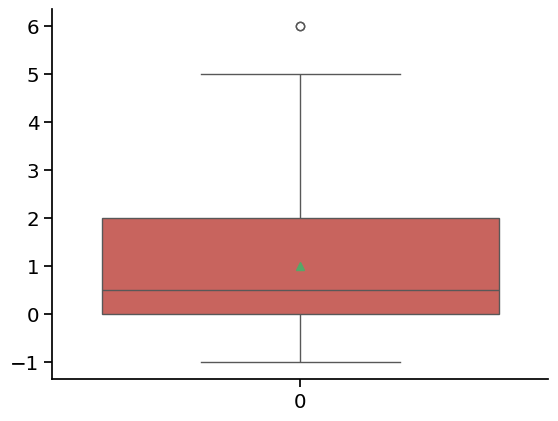

In [137]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

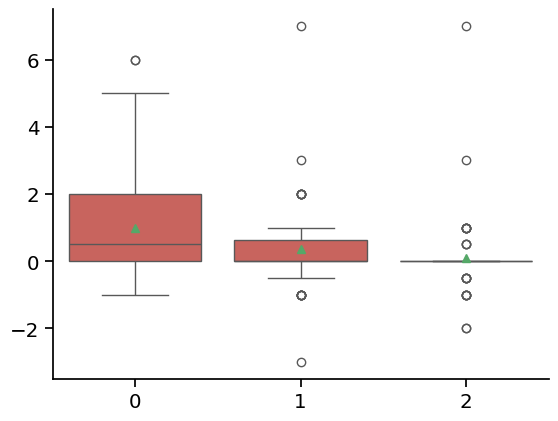

In [138]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten(), quasi_results[:, 0, 1, 1].flatten(), quasi_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

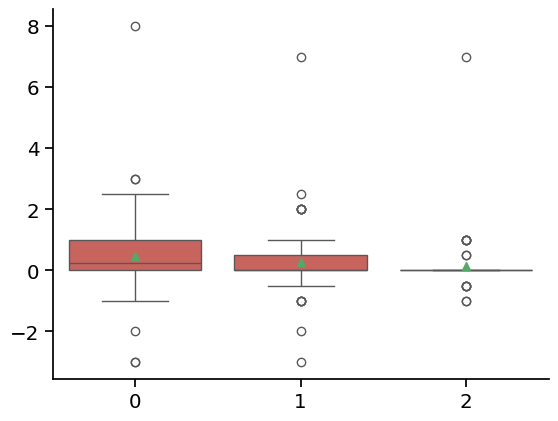

In [139]:
plot_n_boxplots([quasi_results[:, 1, 0, 1].flatten(), quasi_results[:, 1, 1, 1].flatten(), quasi_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [140]:
print(quasi_results[:, 0, 0, 1].flatten())

[ 1.5  0.  -0.5 -0.5  3.   2.5  1.   0.5 -0.5  0.   1.   1.   2.   2.5
  0.   3.   4.   1.  -1.   2.   2.   2.   5.   6.   2.  -1.   0.   1.
  0.   2.  -1.   6.   0.   0.   0.   0.  -1.   4.  -1.   1.   0.  -1.
  0.   3.  -1.   1.   3.  -1.   0.   0.5  1.   1.5 -1.   2.5  0.   0.5
  0.5 -1.   0.5  0.   2.   3.   0.5  0. ]


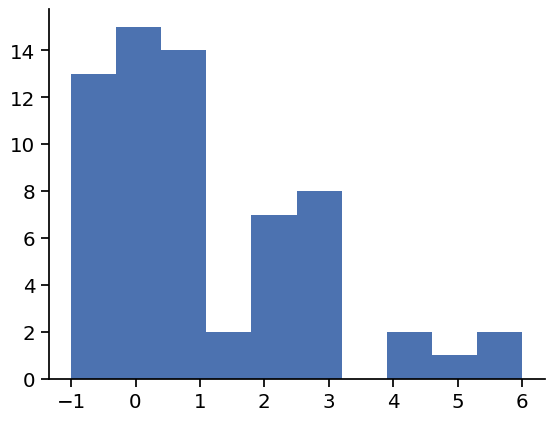

In [141]:
plt.hist(quasi_results[:, 0, 0, 1])
plt.show()

In [142]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

4.713265962478443 1.3905995981052301e-05


Investigating the statisitcs of itteration maximazing the average number of biological components.

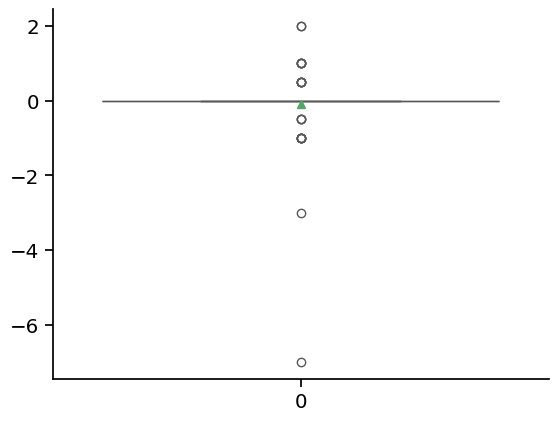

In [143]:
plot_n_boxplots([quasi_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

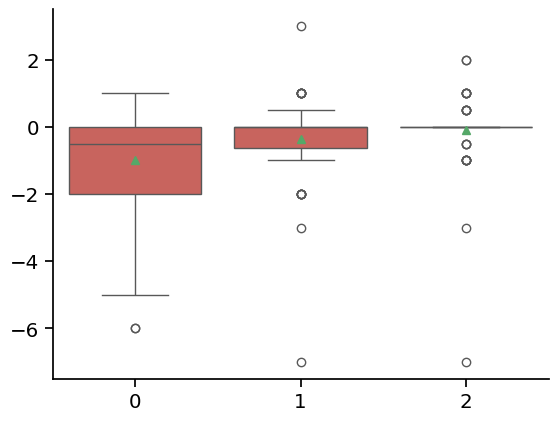

In [144]:
plot_n_boxplots([quasi_results[:, 0, 0, 2].flatten(), quasi_results[:, 0, 1, 2].flatten(), quasi_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

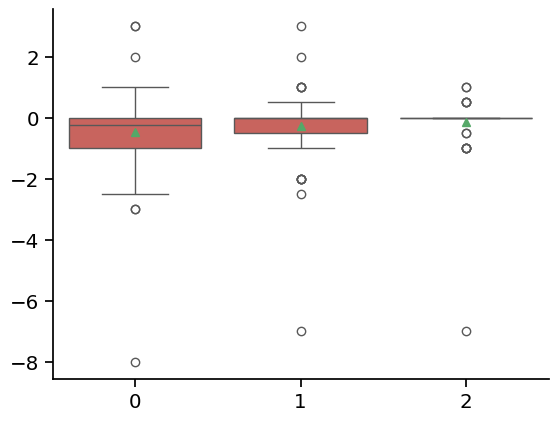

In [145]:
plot_n_boxplots([quasi_results[:, 1, 0, 2].flatten(), quasi_results[:, 1, 1, 2].flatten(), quasi_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [146]:
print(quasi_results[:, 0, 2, 2].flatten())

[-0.  -1.   1.   0.5 -0.  -0.  -0.  -0.   1.  -0.   1.  -0.5  1.   0.5
  1.  -0.  -1.  -0.  -0.  -0.  -0.  -0.  -0.  -3.  -0.  -0.  -0.  -0.
 -0.  -1.  -0.  -7.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.  -0.   2.
 -0.  -0.  -0.  -1.  -0.  -0.   0.5  2.  -1.  -0.   0.5 -1.  -0.  -0.5
 -0.   0.5 -0.5 -0.  -0.  -0.  -0.  -0. ]


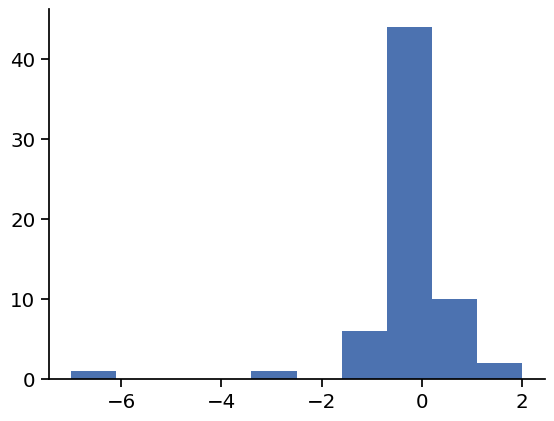

In [147]:
plt.hist(quasi_results[:, 0, 2, 2])
plt.show()

In [148]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 0, 2, 2], popmean=0) 
print(t_statistic , p_value)

-0.6721553605270577 0.5039424843462368


Then Analysis of how peaks thresholding does on its own

In [149]:
epi_peak_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\0\peak")
epi_peak_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\1\peak")

In [150]:
epi_peak_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [151]:
epi_peak_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [152]:
for i, pth in enumerate(epi_peak_ec_folder.iterdir()):
    current = np.load(pth)
    epi_peak_ec_results[i, :, :, :] = current.copy()

In [153]:
for i, pth in enumerate(epi_peak_eo_folder.iterdir()):
    current = np.load(pth)
    epi_peak_eo_results[i, :, :, :] = current.copy()

In [154]:
epi_peak_results = epi_peak_ec_results.__add__(epi_peak_eo_results)/2

In [155]:
wang_peak_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\0\peak")
wang_peak_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\1\peak")

In [156]:
wang_peak_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [157]:
wang_peak_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [158]:
for i, pth in enumerate(wang_peak_ec_folder.iterdir()):
    current = np.load(pth)
    wang_peak_ec_results[i, :, :, :] = current.copy()

In [159]:
for i, pth in enumerate(wang_peak_eo_folder.iterdir()):
    current = np.load(pth)
    wang_peak_eo_results[i, :, :, :] = current.copy()

In [160]:
wang_peak_results = wang_peak_ec_results.__add__(wang_peak_eo_results)/2

In [161]:
srm_peak_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_2_extended\peak")

In [162]:
srm_peak_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [163]:
for i, pth in enumerate(srm_peak_folder.iterdir()):
    current = np.load(pth)
    srm_peak_results[i, :, :, :] = current.copy()

In [164]:
spis_peak_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_2_extended\peak")

In [165]:
spis_peak_results = np.zeros(
    (   
        16,
        2,
        4,
        5
    )
)

In [166]:
for i, pth in enumerate(spis_peak_folder.iterdir()):
    current = np.load(pth)
    spis_peak_results[i, :, :, :] = current.copy()

In [167]:
peak_results = np.zeros(
    (   
        64,
        2,
        4,
        5
    )
)

In [168]:
peak_results[0:16, :, :, :] = epi_peak_results
peak_results[16:32, :, :, :] = srm_peak_results
peak_results[32:48, :, :, :] = spis_peak_results
peak_results[48:64, :, :, :] = wang_peak_results

In [169]:
peak_results[:, :, :, 2] =- peak_results[:, :, :, 1]

In [170]:
print(np.argwhere(np.isnan(peak_results)))
print(np.argwhere(np.isnan(peak_results)))

[]
[]


In [171]:
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 0], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 1], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 2], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 3], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 4], 0)), (2, 4)))

(0, 0)
(0, 0)
(0, 3)
(0, 0)
(0, 0)


In [172]:
#best median
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 0], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 1], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 2], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 3], 0)), (2, 4)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 4], 0)), (2, 4)))

(0, 0)
(0, 0)
(0, 2)
(0, 0)
(0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

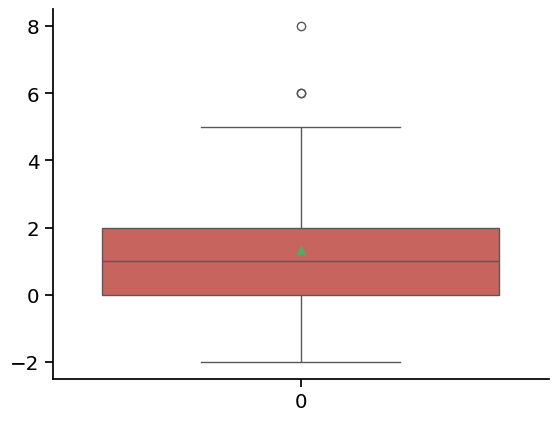

In [173]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

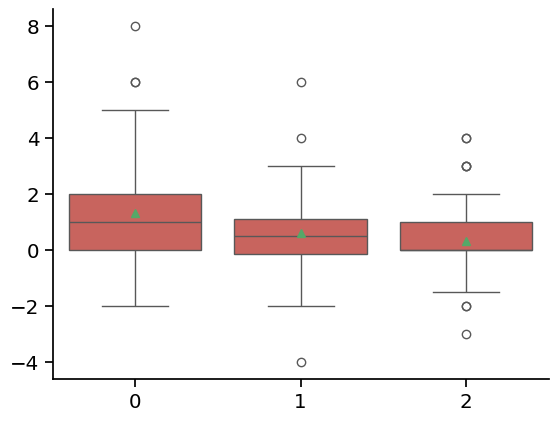

In [174]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten(), peak_results[:, 0, 1, 1].flatten(), peak_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

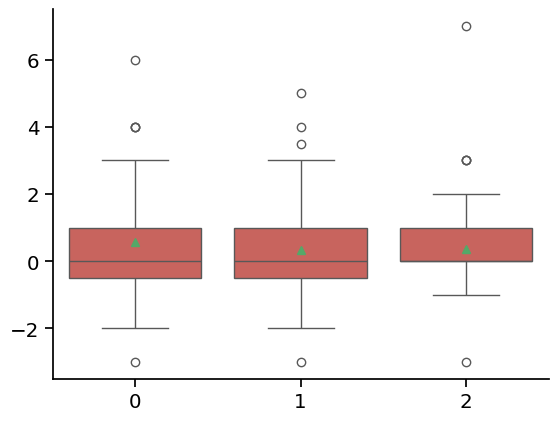

In [175]:
plot_n_boxplots([peak_results[:, 1, 0, 1].flatten(), peak_results[:, 1, 1, 1].flatten(), peak_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [176]:
print(peak_results[:, 0, 0, 1].flatten())

[ 2.5  2.   0.  -2.   4.5  0.5  1.   1.5 -1.   0.5  1.   2.   0.5  3.
 -1.   2.   4.   2.   6.   0.   2.   2.   3.   2.   3.   0.   5.   0.
  0.   8.   0.   4.  -1.   0.   2.   1.   3.   6.   2.   2.  -1.   0.
  2.   1.   0.   1.   2.   0.  -1.   1.5  0.  -0.5 -0.5  2.   1.   2.
  1.  -1.   2.   0.  -1.5  1.5  0.5 -0.5]


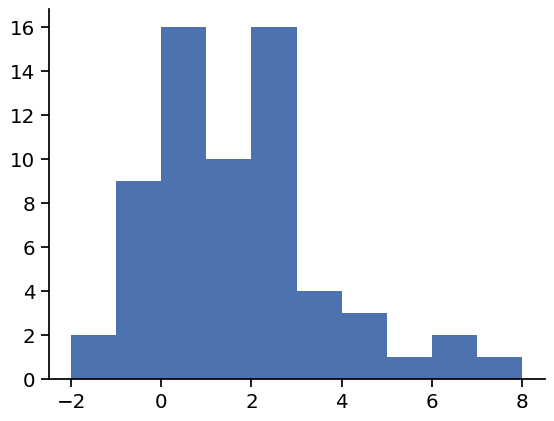

In [177]:
plt.hist(peak_results[:, 0, 0, 1])
plt.show()

In [178]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

5.5079419714631666 7.14687628265074e-07


Investigating the statisitcs of itteration maximazing the average number of biological components.

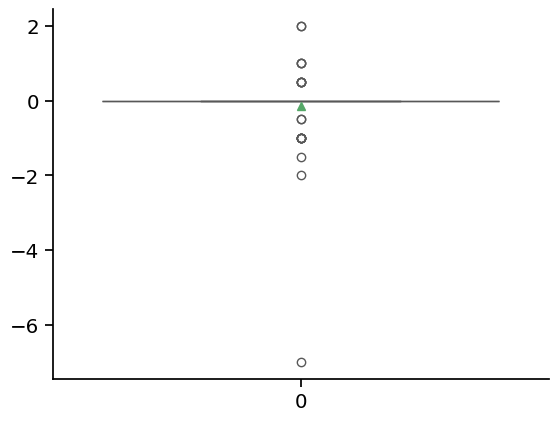

In [179]:
plot_n_boxplots([peak_results[:, 0, 3, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\plotting\templates.py:117: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


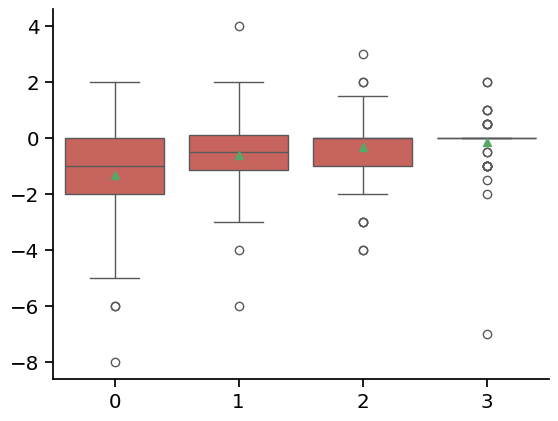

In [180]:
plot_n_boxplots([peak_results[:, 0, 0, 2].flatten(), peak_results[:, 0, 1, 2].flatten(), peak_results[:, 0, 2, 2].flatten(), peak_results[:, 0, 3, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\plotting\templates.py:117: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


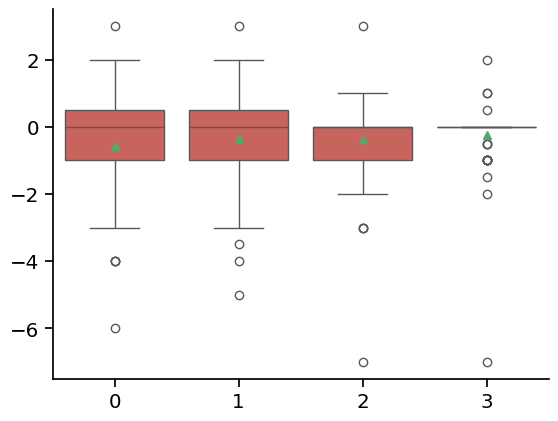

In [181]:
plot_n_boxplots([peak_results[:, 1, 0, 2].flatten(), peak_results[:, 1, 1, 2].flatten(), peak_results[:, 1, 2, 2].flatten(), peak_results[:, 1, 3, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [182]:
print(peak_results[:, 0, 3, 2].flatten())

[-0.   0.5  0.5 -0.  -0.  -0.  -0.  -1.5  1.  -0.  -0.  -0.5  0.5 -2.
  1.  -0.  -0.  -0.  -0.  -0.  -1.  -0.  -0.  -0.  -0.  -0.  -0.  -0.
 -0.  -1.  -0.  -7.  -0.  -0.  -0.  -0.  -0.  -0.  -1.  -0.   2.  -0.
 -0.  -0.  -0.  -0.  -0.  -0.  -0.   2.  -1.  -0.   0.5 -1.  -0.   0.5
 -0.   1.  -1.  -0.  -0.  -1.  -0.  -0.5]


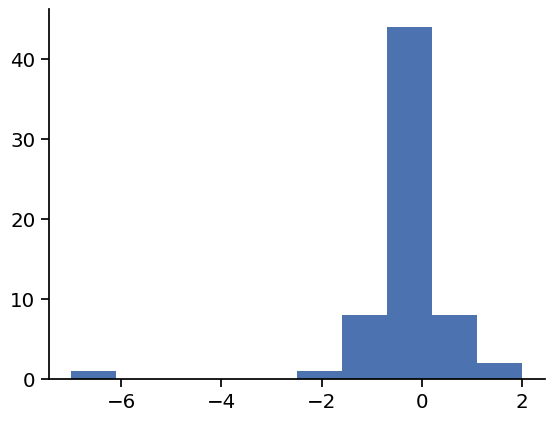

In [183]:
plt.hist(peak_results[:, 0, 3, 2])
plt.show()

In [184]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 0, 3, 2], popmean=0) 
print(t_statistic , p_value)

-1.0398909424945788 0.3023651059944992


Then comined!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [185]:
epi_combined_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\0\combined")
epi_combined_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_2_extended\1\combined")

In [186]:
epi_combined_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [187]:
epi_combined_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [188]:
for i, pth in enumerate(epi_combined_ec_folder.iterdir()):
    current = np.load(pth)
    epi_combined_ec_results[i, :, :, :, :, :] = current.copy()

In [189]:
for i, pth in enumerate(epi_combined_eo_folder.iterdir()):
    current = np.load(pth)
    epi_combined_eo_results[i, :, :, :, :, :] = current.copy()

In [190]:
epi_combined_results = epi_combined_ec_results.__add__(epi_combined_eo_results)/2

In [191]:
wang_combined_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\0\combined")
wang_combined_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\results_run_2\1\combined")

In [192]:
wang_combined_ec_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [193]:
wang_combined_eo_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [194]:
for i, pth in enumerate(wang_combined_ec_folder.iterdir()):
    current = np.load(pth)
    wang_combined_ec_results[i, :, :, :, :, :] = current.copy()

In [195]:
for i, pth in enumerate(wang_combined_eo_folder.iterdir()):
    current = np.load(pth)
    wang_combined_eo_results[i, :, :, :, :, :] = current.copy()

In [196]:
wang_combined_results = wang_combined_ec_results.__add__(wang_combined_eo_results)/2

In [197]:
srm_combined_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_2_extended\combined")

In [198]:
srm_combined_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [199]:
for i, pth in enumerate(srm_combined_folder.iterdir()):
    current = np.load(pth)
    srm_combined_results[i, :, :, :, :, :] = current.copy()

In [200]:
spis_combined_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_2_extended\combined")

In [201]:
spis_combined_alternate_results = np.zeros(
    (   
        8,
        2,
        4,
        2,
        4,
        5
    )
)

In [202]:
spis_combined_results = np.zeros(
    (   
        16,
        2,
        4,
        2,
        4,
        5
    )
)

In [203]:
count=0
for i, pth in enumerate(spis_combined_folder.iterdir()):
    current = np.load(pth)
    spis_combined_alternate_results[count, :] += current.copy()
    if i%2 != 0:
        count+=1

In [204]:
spis_combined_alternate_results /= 2

In [205]:
for i, pth in enumerate(spis_combined_folder.iterdir()):
    current = np.load(pth)
    spis_combined_results[i, :, :, :, :, :] = current.copy()

In [206]:
combined_results = np.zeros(
    (   
        64,
        2,
        3,
        2,
        4,
        5
    )
)

In [207]:
combined_alternate_results = np.zeros(
    (   
        56,
        2,
        3,
        2,
        4,
        5
    )
)

In [208]:
combined_results[0:16, :, :, :] = epi_combined_results[:, :, 1:, :, :, :]
combined_results[16:32, :, :, :] = srm_combined_results[:, :, 1:, :, :, :]
combined_results[32:48, :, :, :] = spis_combined_results[:, :, 1:, :, :, :]
combined_results[48:64, :, :, :] = wang_combined_results[:, :, 1:, :, :, :]

In [209]:
combined_alternate_results[0:16, :, :, :] = epi_combined_results[:, :, 1:, :, :, :]
combined_alternate_results[16:32, :, :, :] = srm_combined_results[:, :, 1:, :, :, :]
combined_alternate_results[32:40, :, :, :] = spis_combined_alternate_results[:, :, 1:, :, :, :]
combined_alternate_results[40:56, :, :, :] = wang_combined_results[:, :, 1:, :, :, :]

In [210]:
combined_results[:, :, :, :, :, 2] -= combined_results[:, :, :, :, :, 1]
combined_alternate_results[:, :, :, :, :, 2] -= combined_alternate_results[:, :, :, :, :, 1]

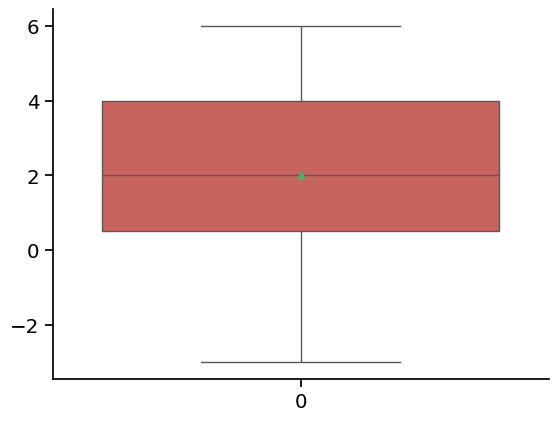

In [211]:
plot_n_boxplots([combined_alternate_results[:, 0, 0, 0, 0, 1]], [sns.xkcd_rgb["pale red"]])

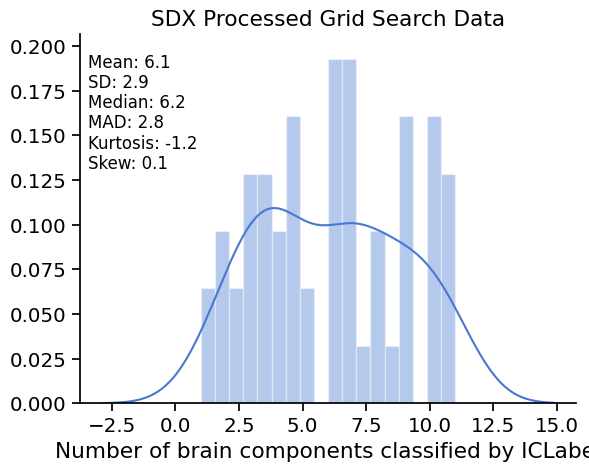

In [212]:
plot_dist_hist(combined_alternate_results[:, 0, 0, 0, 0, 1]+baseline_results_alternate[:, 1], 'SDX Processed Grid Search Data', 'Number of brain components classified by ICLabel')
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\grid_brain_sdx")

In [213]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\mine", combined_alternate_results[:, 0, 0, 0, 0, 1]+baseline_results_alternate[:, 1])
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\mine_ex", combined_alternate_results[:, 0, 0, 0, 0, 0])

In [214]:
print(combined_alternate_results[:, 0, 0, 0, 0, 1]+baseline_results_alternate[:, 1])

[ 6.5  2.   1.5  2.   6.5  8.   8.5  9.   7.   4.5  2.5  8.   3.  10.
  3.5  8.   9.   7.  11.   6.   9.   6.   7.   7.  11.   7.   7.   9.
  5.  10.  10.  11.   3.   7.5  4.5  3.5  4.   5.  10.   4.5  3.   4.
  4.5  2.   3.   9.   1.   6.   6.5  2.5  4.5 10.   4.  11.   3.5  3.5]


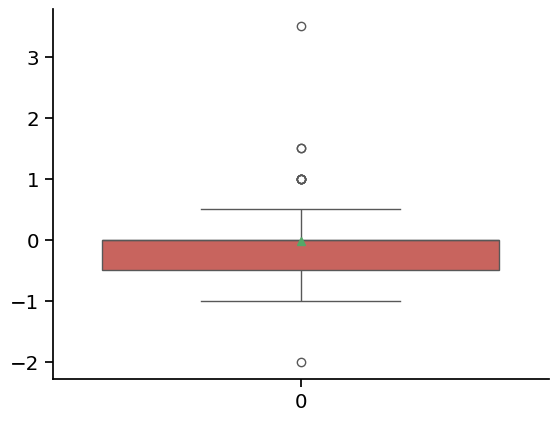

In [215]:
plot_n_boxplots([combined_alternate_results[:, 0, 2, 1, 3, 2]], [sns.xkcd_rgb["pale red"]])

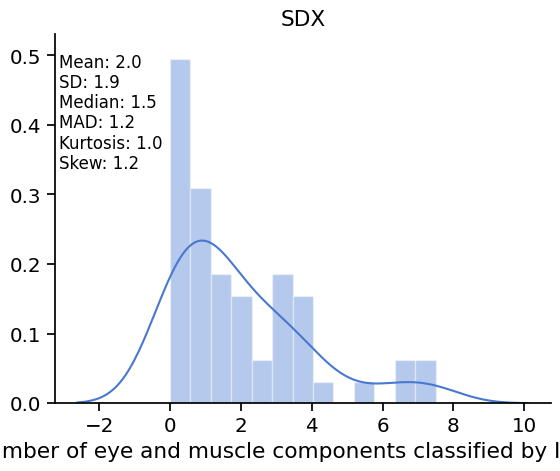

In [216]:
plot_dist_hist(combined_alternate_results[:, 0, 2, 1, 3, 2]+baseline_results_alternate[:, 2], 'SDX', 'Number of eye and muscle components classified by ICLabel')
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\grid_artefact_sdx")

In [217]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\mine", combined_alternate_results[:, 0, 2, 1, 3, 2]+baseline_results_alternate[:, 2])
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\mine_ex", combined_alternate_results[:, 0, 2, 1, 3, 0])

In [646]:
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 0], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 1], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 2], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 3], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 4], 0)), (2, 3, 2, 4)))

(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 2, 1, 3)
(0, 0, 0, 0)
(0, 0, 0, 0)


In [79]:
#best median
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 0], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 1], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 2], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 3], 0)), (2, 3, 2, 4)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 4], 0)), (2, 3, 2, 4)))

(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 1, 2)
(0, 0, 0, 0)
(0, 0, 0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

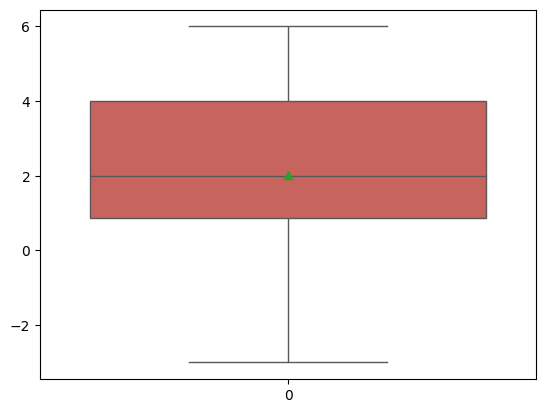

In [648]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

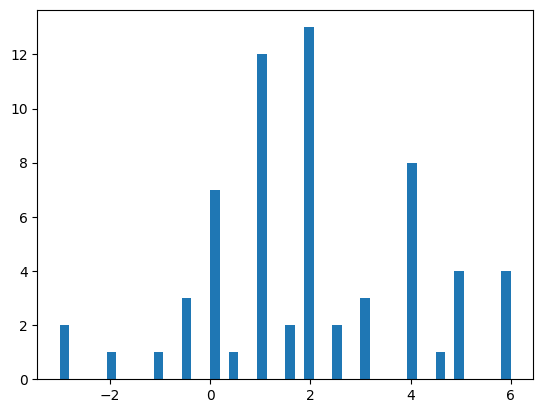

In [101]:
plt.hist(combined_results[:, 0, 0, 0, 0, 1], bins = 48)
plt.show()

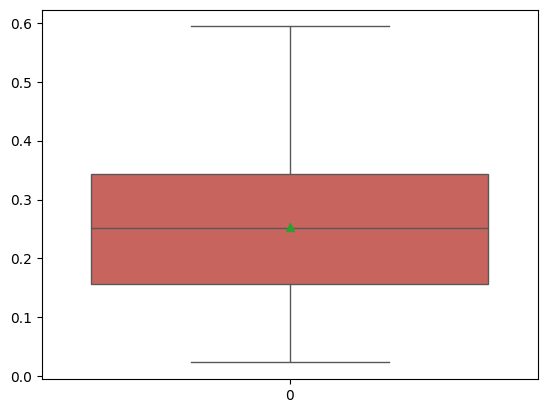

In [97]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 0].flatten()], [sns.xkcd_rgb["pale red"]])

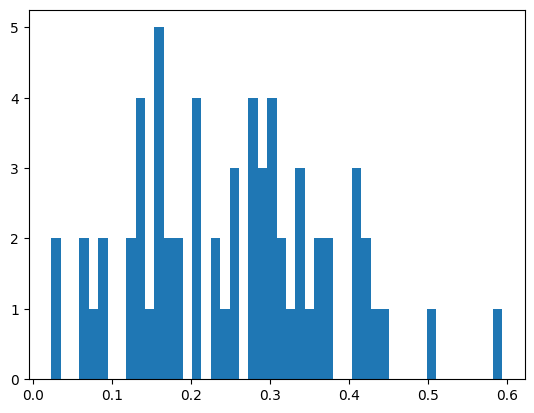

In [98]:
plt.hist(combined_results[:, 0, 0, 0, 0, 0].flatten(), bins=48)
plt.show()

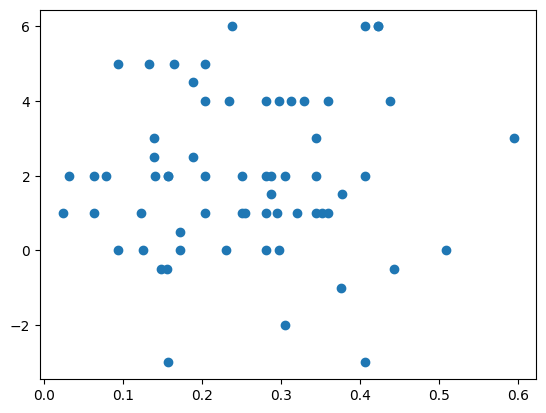

In [99]:
plt.scatter(combined_results[:, 0, 0, 0, 0, 0], combined_results[:, 0, 0, 0, 0, 1])
plt.show()

Compared to the other thresholds

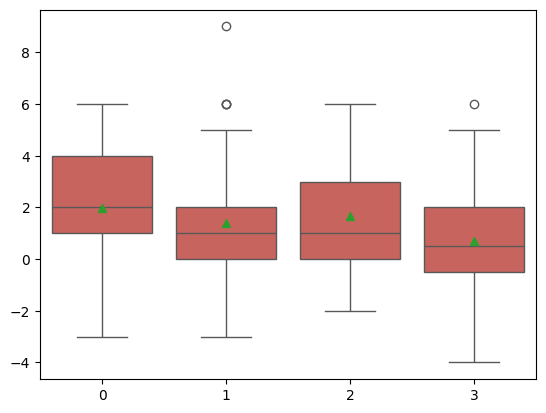

In [100]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1], combined_results[:, 0, 1, 0, 0, 1], combined_results[:, 0, 0, 0, 1, 1], combined_results[:, 0, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

All mean.. The lower peaks threshold gives a better median, but mean stays the same and spred is higher.
all median?

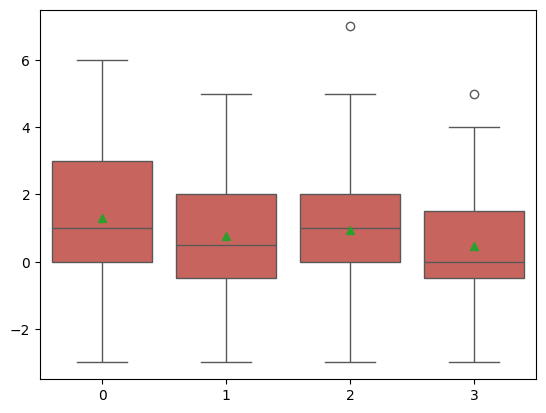

In [101]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 0, 1], combined_results[:, 1, 1, 1, 0, 1], combined_results[:, 1, 0, 1, 1, 1], combined_results[:, 1, 1, 1, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Quasi median?

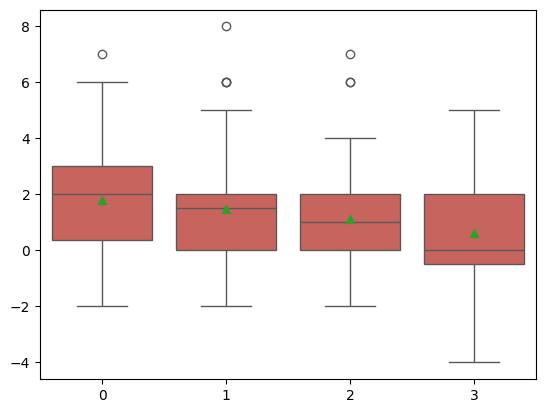

In [102]:
plot_n_boxplots([combined_results[:, 1, 0, 0, 0, 1], combined_results[:, 1, 1, 0, 0, 1], combined_results[:, 1, 0, 0, 1, 1], combined_results[:, 1, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

peaks median?

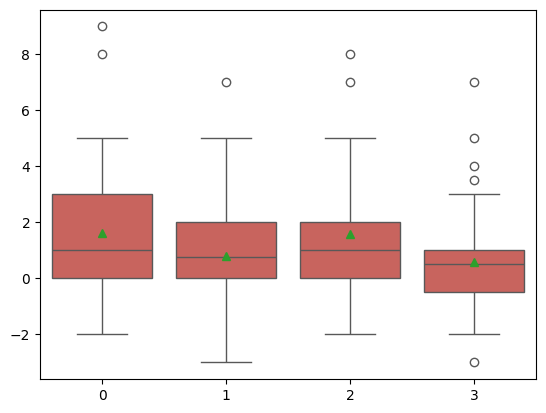

In [103]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 1], combined_results[:, 0, 1, 1, 0, 1], combined_results[:, 0, 0, 1, 1, 1], combined_results[:, 0, 1, 1, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [104]:
print(combined_results[:, 0, 0, 0, 0, 1].flatten())

[ 2.  -1.   0.  -3.   6.   2.   1.   2.   0.   2.   2.   5.  -2.   5.
  1.   1.   4.   4.   4.   4.   0.   4.   4.   4.   1.  -3.   3.   1.
  1.   6.   2.   5.   1.   0.   2.   2.   5.   6.   2.   2.   1.   0.
  2.   3.   0.   1.   4.   2.   1.   2.5  1.   6.   0.   2.5  1.5  1.5
  2.  -0.5  3.  -0.5  0.5  4.5  1.  -0.5]


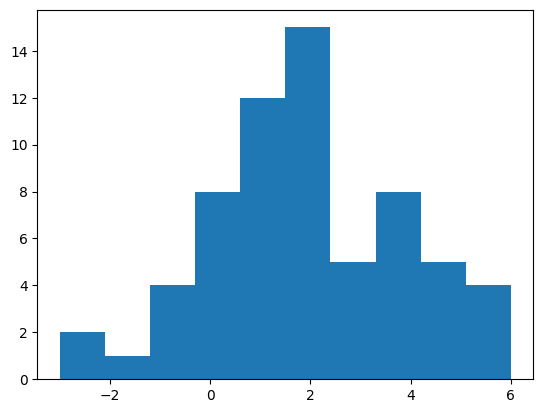

In [105]:
plt.hist(combined_results[:, 0, 0, 0, 0, 1])
plt.show()

In [297]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 1, 0, 1, 3, 1], popmean=0) 
print(t_statistic , p_value)

3.9019978469749916 0.00023462207755647833


Investigating the statisitcs of itteration maximazing the average number of biological components.

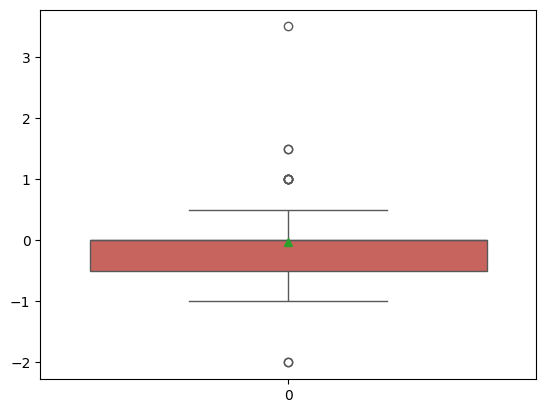

In [649]:
plot_n_boxplots([combined_results[:, 0, 2, 1, 3, 2].flatten()], [sns.xkcd_rgb["pale red"]])

This one for n_brain

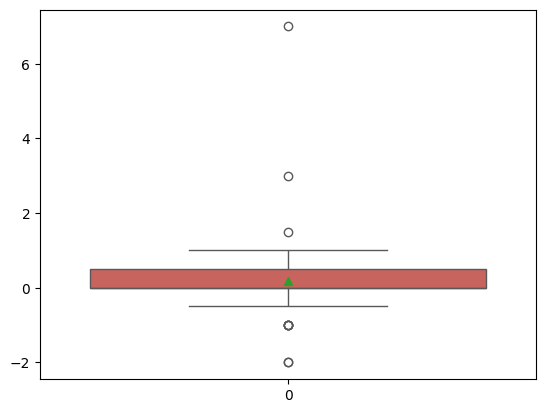

In [650]:
plot_n_boxplots([combined_results[:, 0, 2, 1, 3, 1].flatten()], [sns.xkcd_rgb["pale red"]])

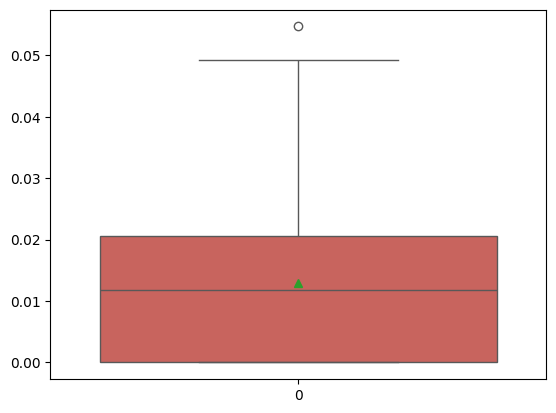

In [660]:
plot_n_boxplots([combined_results[:, 0, 2, 1, 3, 0].flatten()], [sns.xkcd_rgb["pale red"]])

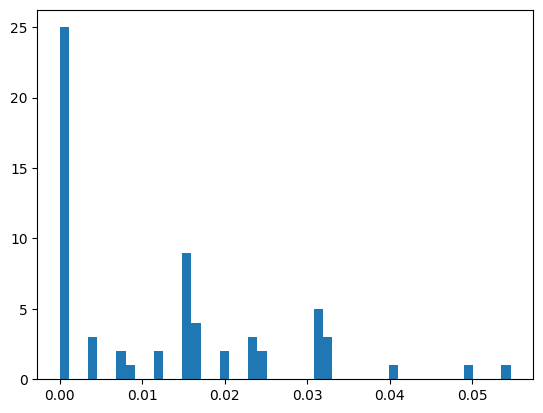

In [652]:
plt.hist(combined_results[:, 0, 2, 1, 3, 0].flatten(), bins=48)
plt.show()

In [653]:
print(combined_results[:, 0, 2, 1, 3, 0].flatten())

[0.0234375  0.0546875  0.0234375  0.01953125 0.01953125 0.01171875
 0.00390625 0.015625   0.0234375  0.         0.00390625 0.0078125
 0.0078125  0.01171875 0.03125    0.00390625 0.03125    0.
 0.         0.         0.015625   0.         0.         0.015625
 0.         0.         0.03125    0.015625   0.         0.015625
 0.03125    0.015625   0.         0.015625   0.         0.
 0.         0.         0.015625   0.         0.         0.015625
 0.         0.         0.         0.03125    0.         0.
 0.04918033 0.         0.01639344 0.02459016 0.04098361 0.01639344
 0.01639344 0.         0.03278689 0.         0.00819672 0.01639344
 0.02459016 0.         0.03278689 0.03278689]


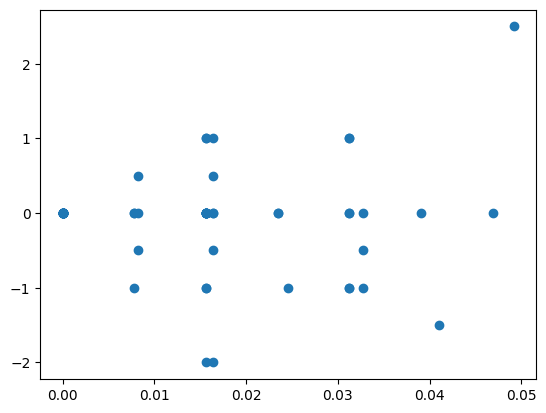

In [129]:
plt.scatter(combined_results[:, 1, 1, 1, 3, 0], combined_results[:, 1, 1, 1, 3, 2])
plt.show()

The one that maximises median

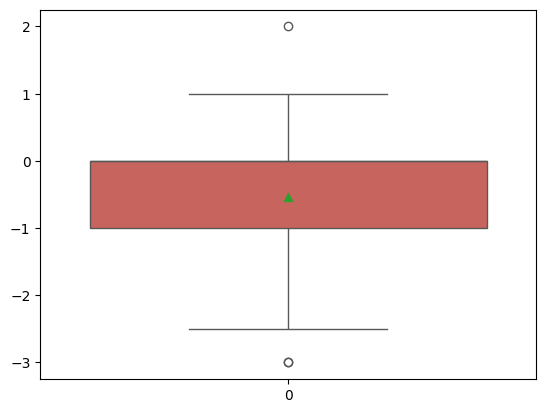

In [130]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"]])

useless

Compared to the other thresholds

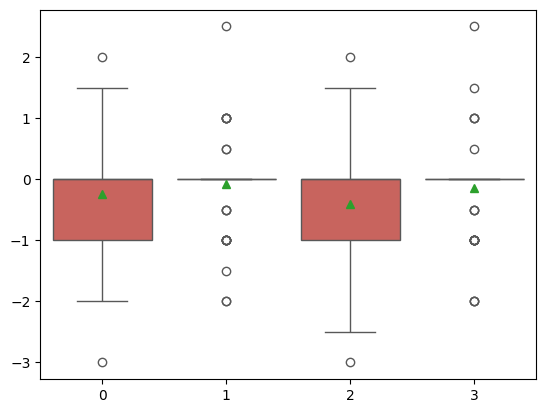

In [174]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 3, 2], combined_results[:, 1, 1, 1, 3, 2], combined_results[:, 1, 0, 1, 2, 2], combined_results[:, 1, 1, 1, 2, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

all mean?

c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\plotting\templates.py:111: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


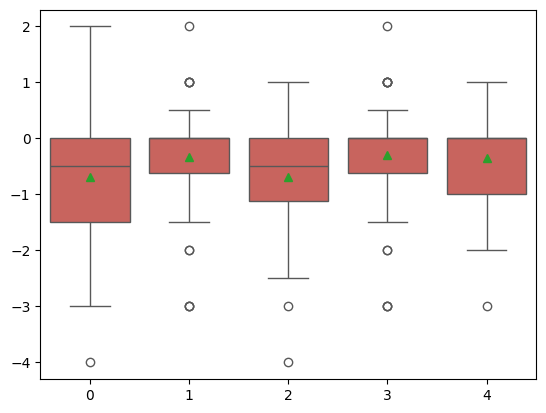

In [133]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 3, 2], combined_results[:, 0, 1, 0, 3, 2], combined_results[:, 0, 0, 0, 2, 2], combined_results[:, 0, 1, 0, 2, 2], combined_results[:, 1, 1, 1, 1, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

No bueno
all mean?

More stats for the best one.

In [134]:
print(combined_results[:, 1, 1, 1, 3, 2].flatten())

[-1.   0.   0.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
  0.   0.  -1.   0.   0.   1.  -1.   0.   0.   0.   0.   0.  -1.   0.
  1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  -2.   0.   0.   2.5 -0.5  1.   0.   0.  -1.   0.   0.5
  0.  -0.5 -2.   0.5 -1.  -1.5  0.  -0.5]


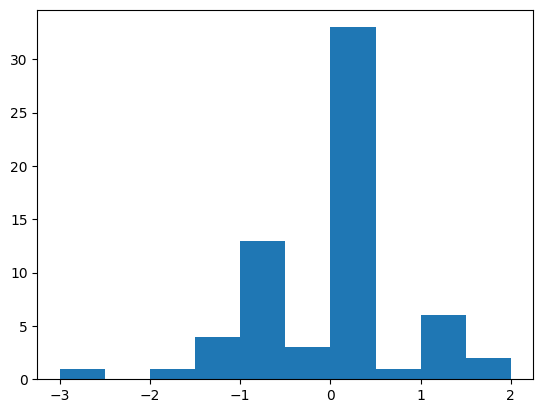

In [194]:
plt.hist(combined_results[:, 1, 0, 1, 3, 2])
plt.show()

In [284]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 1, 1, 1, 3, 2], popmean=0) 
print(t_statistic , p_value)

-1.0085028765624269 0.31707093464151787


best from each con of distributions

Best mean

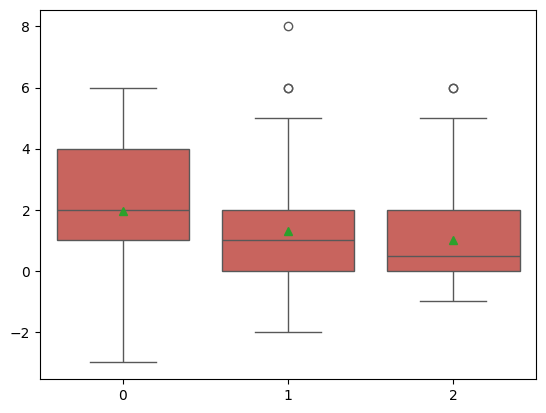

In [175]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1], peak_results[:, 0, 0, 1], quasi_results[:, 0, 0, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

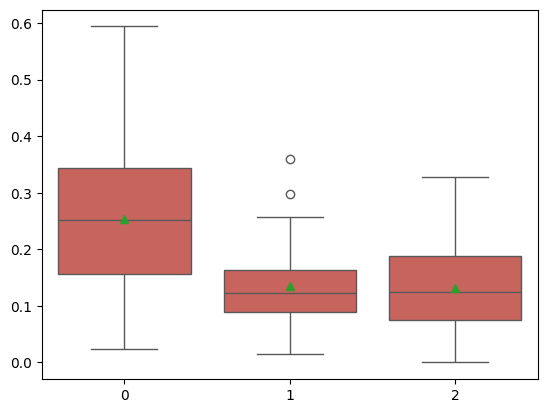

In [176]:
# discarded
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 0], peak_results[:, 0, 0, 0], quasi_results[:, 0, 0, 0]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

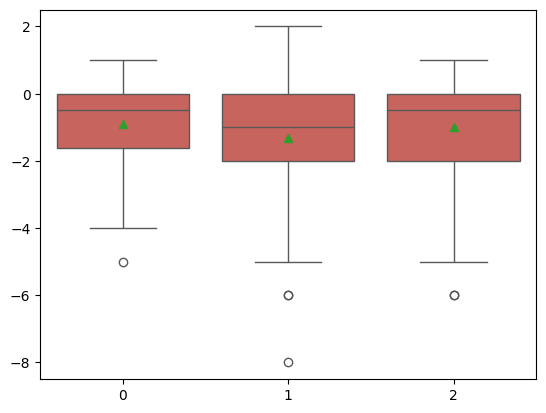

In [185]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 2], peak_results[:, 0, 0, 2], quasi_results[:, 0, 0, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Best biocomp

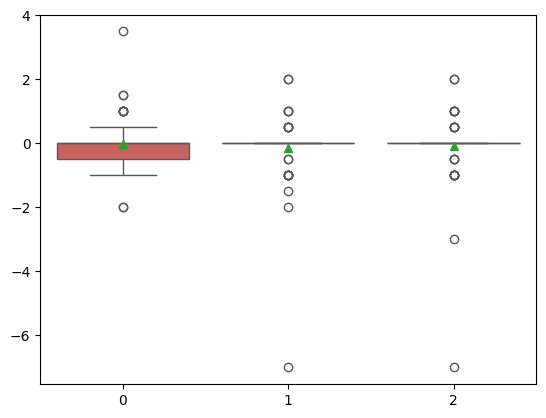

In [654]:
plot_n_boxplots([combined_results[:, 0, 2, 1, 3, 2], peak_results[:, 0, 3, 2], quasi_results[:, 0, 2, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

In [656]:
print(np.mean(combined_results[:, 0, 2, 1, 3, 2]), np.mean(peak_results[:, 0, 3, 2]), np.mean(quasi_results[:, 0, 2, 2]))

-0.03125 -0.140625 -0.09375


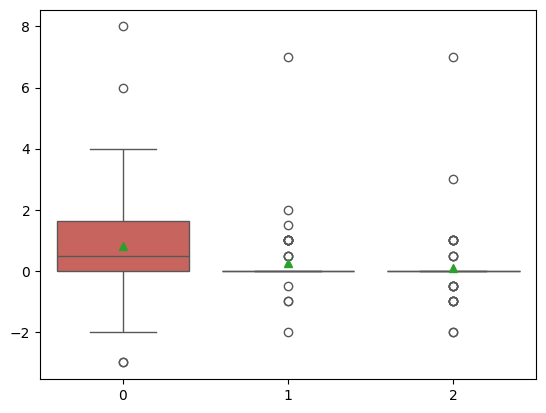

In [295]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 3, 1], peak_results[:, 1, 3, 1], quasi_results[:, 0, 2, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

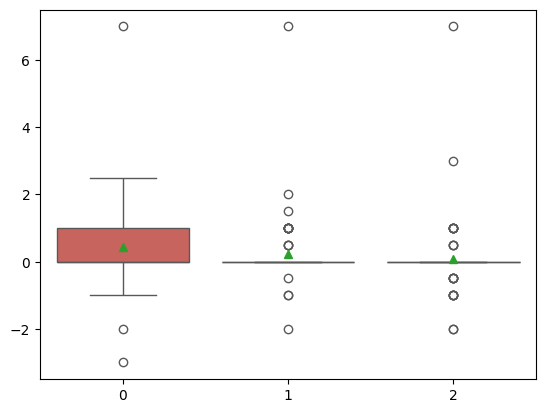

In [296]:
plot_n_boxplots([combined_results[:, 1, 1, 1, 3, 1], peak_results[:, 1, 3, 1], quasi_results[:, 0, 2, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

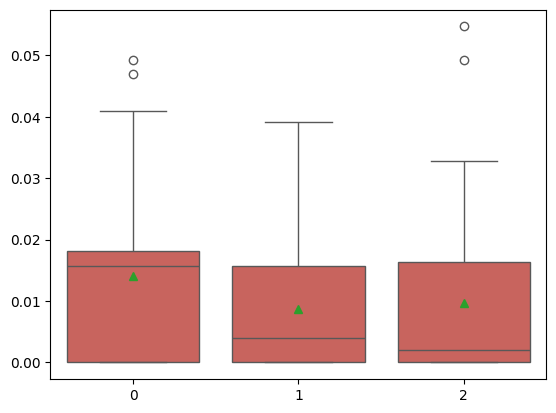

In [181]:
#Discarded
plot_n_boxplots([combined_results[:, 1, 1, 1, 3, 0], peak_results[:, 0, 3, 0], quasi_results[:, 0, 2, 0]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])